In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd /content/drive/MyDrive/NLP/TextAnalysis/Project

In [80]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

## 1. Vectorization

In [81]:
max_features = 20000
sequence_length = 60
embedding_len = 128

In [82]:
vectorization_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    encoding='utf-8',
    output_sequence_length=sequence_length
)

In [83]:
types = ["vanhoa", "phapluat", "thethao", "giaoduc", "chinhtri", "kinhte", "xahoi"]

sentences = []
y = []
for i in range(len(types)):
    with open(f"./process_data/{types[i]}.txt", "r", encoding="utf-8") as f:
        for line in f.readlines():
            sentences.append(line)
            y.append(i)
vectorization_layer.adapt(sentences)

## 2. Data

In [84]:
x = vectorization_layer(sentences)
y = np.asarray(y, dtype="int64")
y = tf.convert_to_tensor(y)

In [85]:
x.shape, y.shape

(TensorShape([14189, 60]), TensorShape([14189]))

In [86]:
x_train, x_val, y_train, y_val = train_test_split(x.numpy(), y.numpy(), test_size=0.2, random_state=42, stratify=y.numpy())

In [87]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((11351, 60), (2838, 60), (11351,), (2838,))

## 3. Model 1: CNN + MaxPooling

In [11]:
# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64")
x = tf.keras.layers.Embedding(max_features, embedding_len)(inputs)
x = tf.keras.layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Flatten()(x)
dense1 = tf.keras.layers.Dense(64, activation="relu")(x)
dense2 = tf.keras.layers.Dense(64, activation="relu")(dense1)
dense3 = tf.keras.layers.Dense(64, activation="relu")(dense2)
predictions = tf.keras.layers.Dense(7, activation="sigmoid", name="predictions")(dense3)

model = tf.keras.Model(inputs, predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 128)           2560000   
                                                                 
 conv1d (Conv1D)             (None, 60, 128)           49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 30, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 128)           49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 128)          0         
 1D)                                                         

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs = 30, validation_data=(x_val, y_val))

Epoch 1/30


: 

: 

<Figure size 1000x1000 with 0 Axes>

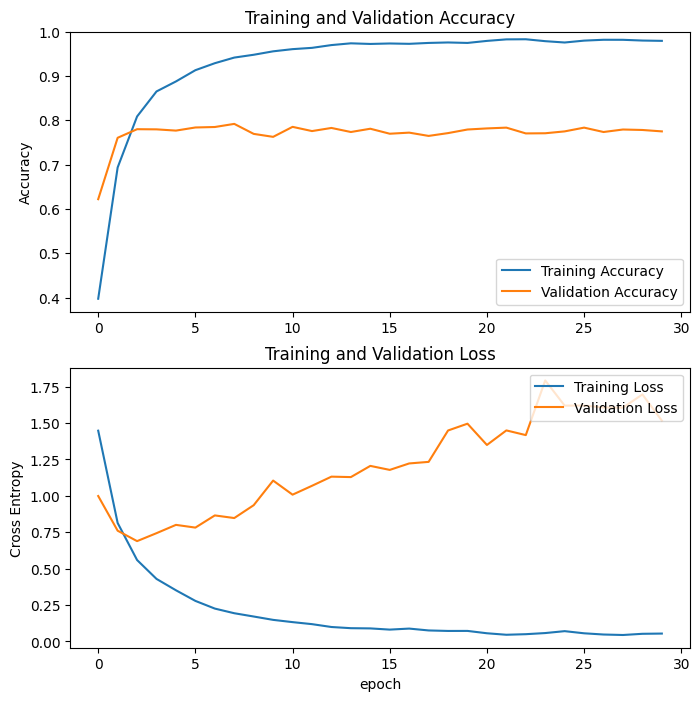

In [ ]:
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## 4. Model 2: CNN + MaxPooling + RNN

In [ ]:
# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64")
x = tf.keras.layers.Embedding(max_features, embedding_len)(inputs)
x = tf.keras.layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.SimpleRNN(64, activation="relu")(x)
dense1 = tf.keras.layers.Dense(64, activation="relu")(x)
dense2 = tf.keras.layers.Dense(64, activation="relu")(dense1)
dense3 = tf.keras.layers.Dense(64, activation="relu")(dense2)
predictions = tf.keras.layers.Dense(7, activation="sigmoid", name="predictions")(dense3)

model = tf.keras.Model(inputs, predictions)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 60)]              0         
                                                                 
 embedding_11 (Embedding)    (None, 60, 128)           2560000   
                                                                 
 conv1d_28 (Conv1D)          (None, 60, 128)           49280     
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 30, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_29 (Conv1D)          (None, 30, 128)           49280     
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 15, 128)          0         
 g1D)                                                     

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs = 30, validation_data=(x_val, y_val))

Epoch 1/30
355/355 [==============================] - 25s 54ms/step - loss: 1.8923 - accuracy: 0.1739 - val_loss: 1.6379 - val_accuracy: 0.2946
Epoch 2/30
355/355 [==============================] - 7s 21ms/step - loss: 1.3254 - accuracy: 0.4405 - val_loss: 1.1954 - val_accuracy: 0.5078
Epoch 3/30
355/355 [==============================] - 9s 24ms/step - loss: 0.9870 - accuracy: 0.6343 - val_loss: 0.9678 - val_accuracy: 0.6564
Epoch 4/30
355/355 [==============================] - 7s 19ms/step - loss: 0.7492 - accuracy: 0.7368 - val_loss: 0.8590 - val_accuracy: 0.7093
Epoch 5/30
355/355 [==============================] - 9s 24ms/step - loss: 0.6054 - accuracy: 0.7953 - val_loss: 0.8566 - val_accuracy: 0.7269
Epoch 6/30
355/355 [==============================] - 6s 18ms/step - loss: 0.5157 - accuracy: 0.8316 - val_loss: 0.8440 - val_accuracy: 0.7378
Epoch 7/30
355/355 [==============================] - 8s 24ms/step - loss: 0.4481 - accuracy: 0.8612 - val_loss: 0.8528 - val_accuracy: 0.747

<Figure size 1000x1000 with 0 Axes>

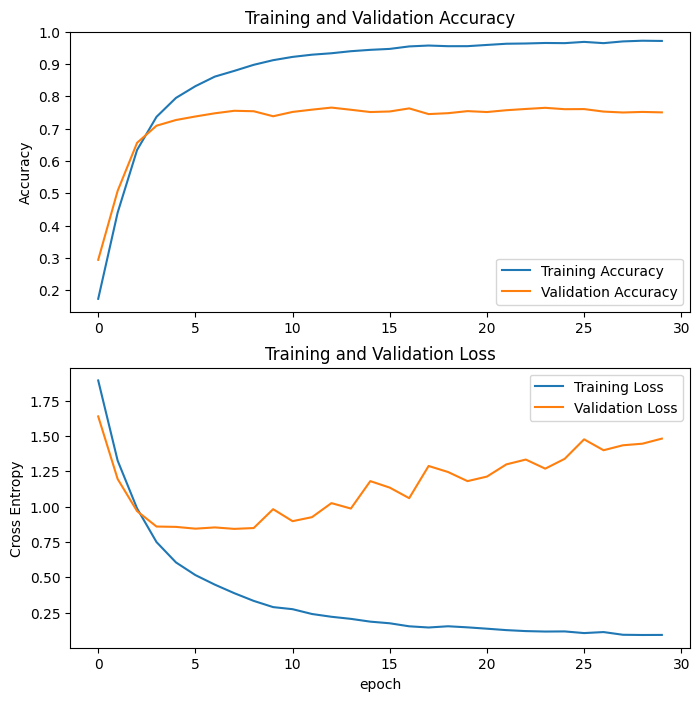

In [ ]:
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## 5. Model 3: CNN + MaxPooling + LSTM

In [ ]:
# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64")
x = tf.keras.layers.Embedding(max_features, embedding_len)(inputs)
x = tf.keras.layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.LSTM(64)(x)
dense1 = tf.keras.layers.Dense(64, activation="relu")(x)
dense2 = tf.keras.layers.Dense(64, activation="relu")(dense1)
dense3 = tf.keras.layers.Dense(64, activation="relu")(dense2)
predictions = tf.keras.layers.Dense(7, activation="sigmoid", name="predictions")(dense3)

model = tf.keras.Model(inputs, predictions)
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 60)]              0         
                                                                 
 embedding_12 (Embedding)    (None, 60, 128)           2560000   
                                                                 
 conv1d_31 (Conv1D)          (None, 60, 128)           49280     
                                                                 
 max_pooling1d_31 (MaxPoolin  (None, 30, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_32 (Conv1D)          (None, 30, 128)           49280     
                                                                 
 max_pooling1d_32 (MaxPoolin  (None, 15, 128)          0         
 g1D)                                                     

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs = 30, validation_data=(x_val, y_val))

Epoch 1/30
355/355 [==============================] - 20s 43ms/step - loss: 1.5369 - accuracy: 0.3491 - val_loss: 1.3563 - val_accuracy: 0.4401
Epoch 2/30
355/355 [==============================] - 5s 14ms/step - loss: 1.0406 - accuracy: 0.5754 - val_loss: 1.0186 - val_accuracy: 0.6247
Epoch 3/30
355/355 [==============================] - 4s 12ms/step - loss: 0.7213 - accuracy: 0.7455 - val_loss: 0.8264 - val_accuracy: 0.7160
Epoch 4/30
355/355 [==============================] - 5s 14ms/step - loss: 0.5515 - accuracy: 0.8110 - val_loss: 0.7680 - val_accuracy: 0.7720
Epoch 5/30
355/355 [==============================] - 4s 11ms/step - loss: 0.4407 - accuracy: 0.8605 - val_loss: 0.7896 - val_accuracy: 0.7748
Epoch 6/30
355/355 [==============================] - 4s 11ms/step - loss: 0.3721 - accuracy: 0.8871 - val_loss: 0.7685 - val_accuracy: 0.7815
Epoch 7/30
355/355 [==============================] - 5s 14ms/step - loss: 0.3041 - accuracy: 0.9093 - val_loss: 0.8044 - val_accuracy: 0.777

<Figure size 1000x1000 with 0 Axes>

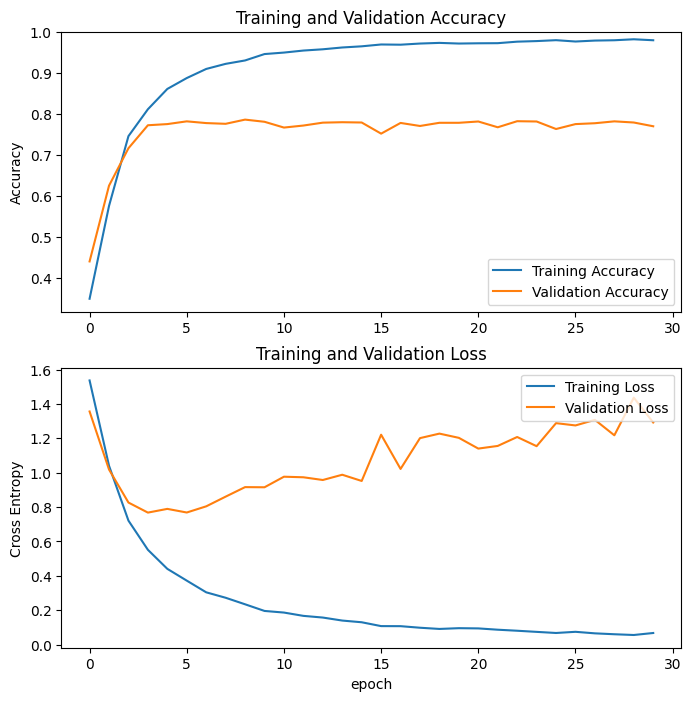

In [ ]:
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## 6. Model 4: CNN + MaxPooling + LSTM

In [ ]:
# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64")
x = tf.keras.layers.Embedding(max_features, embedding_len)(inputs)
x = tf.keras.layers.Flatten()(x)
dense1 = tf.keras.layers.Dense(32, activation="relu")(x)
dense2 = tf.keras.layers.Dense(32, activation="relu")(dense1)
predictions = tf.keras.layers.Dense(7, activation="sigmoid", name="predictions")(dense2)

model = tf.keras.Model(inputs, predictions)
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 60)]              0         
                                                                 
 embedding_13 (Embedding)    (None, 60, 128)           2560000   
                                                                 
 flatten_6 (Flatten)         (None, 7680)              0         
                                                                 
 dense_37 (Dense)            (None, 32)                245792    
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 7)                 231       
                                                                 
Total params: 2,807,079
Trainable params: 2,807,079
Non-tr

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs = 30, validation_data=(x_val, y_val))

Epoch 1/30
355/355 [==============================] - 14s 34ms/step - loss: 1.3908 - accuracy: 0.4869 - val_loss: 0.8424 - val_accuracy: 0.7350
Epoch 2/30
355/355 [==============================] - 5s 13ms/step - loss: 0.6121 - accuracy: 0.8031 - val_loss: 0.7080 - val_accuracy: 0.7706
Epoch 3/30
355/355 [==============================] - 2s 7ms/step - loss: 0.3836 - accuracy: 0.8804 - val_loss: 0.7257 - val_accuracy: 0.7629
Epoch 4/30
355/355 [==============================] - 2s 7ms/step - loss: 0.2436 - accuracy: 0.9288 - val_loss: 0.8272 - val_accuracy: 0.7505
Epoch 5/30
355/355 [==============================] - 2s 5ms/step - loss: 0.1545 - accuracy: 0.9580 - val_loss: 0.9079 - val_accuracy: 0.7526
Epoch 6/30
355/355 [==============================] - 2s 6ms/step - loss: 0.1068 - accuracy: 0.9735 - val_loss: 1.0192 - val_accuracy: 0.7481
Epoch 7/30
355/355 [==============================] - 2s 6ms/step - loss: 0.0826 - accuracy: 0.9799 - val_loss: 1.0827 - val_accuracy: 0.7431
Epo

<Figure size 1000x1000 with 0 Axes>

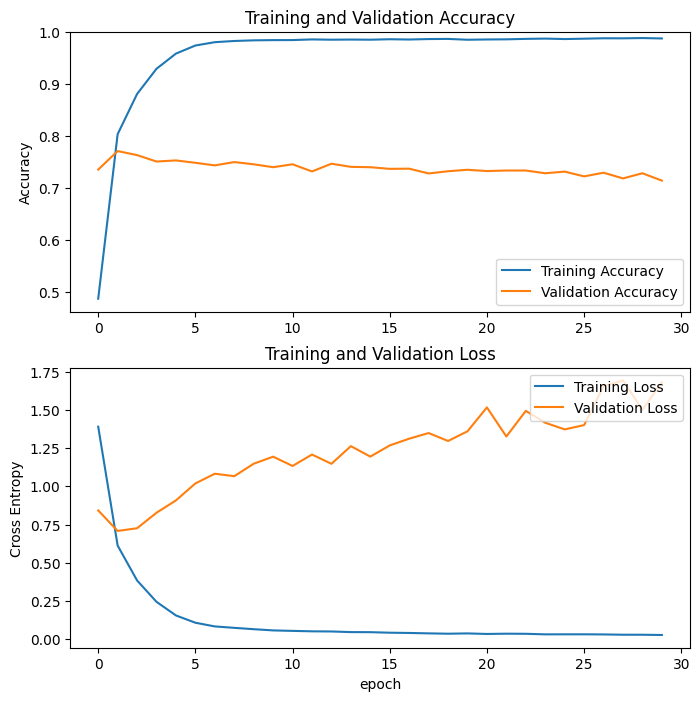

In [ ]:
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Logistic Regression

In [88]:
def sigmoid_fnc(z):
    return 1 / (1 + np.exp(-z))

def predict(x, w):
    z = x @ w
    return sigmoid_fnc(z)

def loss(y, y_hat):
    return (y_hat - y) ** 2

def gradient(x, y, y_hat, batch_size):
    dw = 2 * x.T @ (y_hat - y) / batch_size
    return dw

def update(w, dw, lr):
    return w - lr * dw

def train(x, y, epoch, batch_size, lr):
    y = np.expand_dims(y, axis=1)
    n_sample, n_feature = x.shape
    x = np.concatenate((x, np.ones((len(x), 1))), axis=1)
    theta = np.random.rand(n_feature + 1, 1)
    losses = []
    for _ in range(epoch):
        for i in range(0, n_sample, batch_size):
            xi = x[i:i+batch_size, :]
            yi = y[i:i+batch_size, :]
            # predict
            yp = predict(xi, theta)
            # loss
            l = loss(yi, yp)
            losses.append(l.mean())

            # gradient
            dtheta = gradient(xi, yi, yp, batch_size)

            # update
            theta = update(theta, dtheta, lr)
    return theta, losses

In [89]:
from sklearn import preprocessing
x_train = preprocessing.scale(x_train)

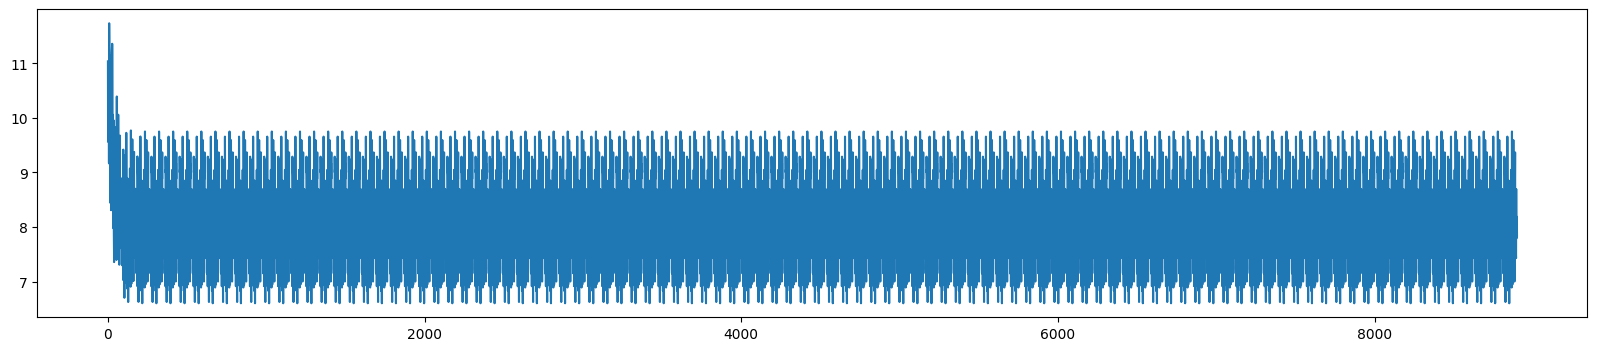

In [97]:
theta, losses = train(x_train, y_train, 100, 128, 0.01)
plt.figure(figsize=(20, 4))
plt.plot(losses)